<a href="https://colab.research.google.com/github/amirahhoss/labs/blob/main/jfr9nu_04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [ ]:
#1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

cars = pd.read_csv("cars_hw.csv")
display(cars)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,23869,1st,5,petrol,6-Speed,Automatic,956000
972,973,Hyundai,2019,white,sedan,14831,1st,5,petrol,6-Speed,Automatic,1027000
973,974,Hyundai,2014,silver,sedan,52846,1st,5,petrol,4-Speed,Automatic,736000
974,975,Ford,2020,white,crossover,28335,2nd,5,diesel,5-Speed,Automatic,749000


In [ ]:
print(cars.dtypes)
cars = cars.drop(cars.columns[0], axis=1)

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object


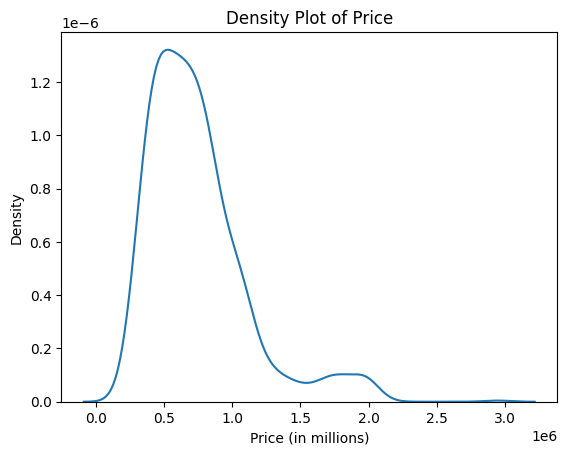

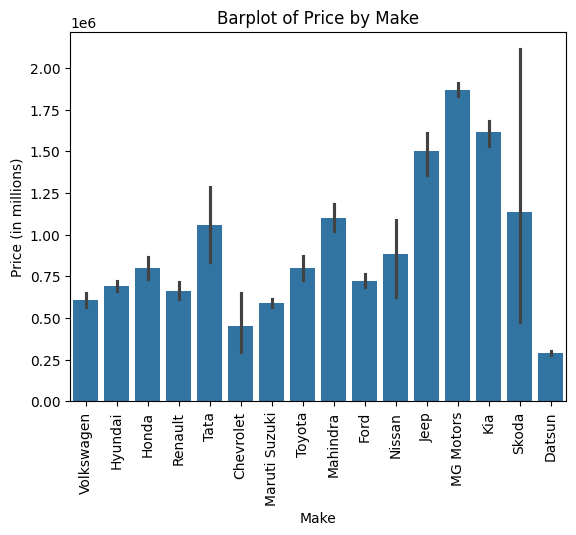

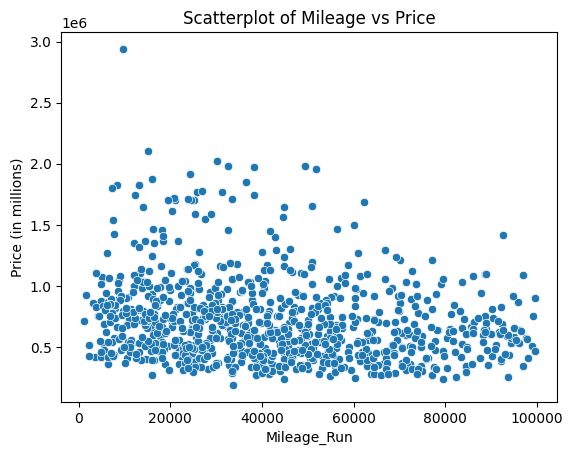

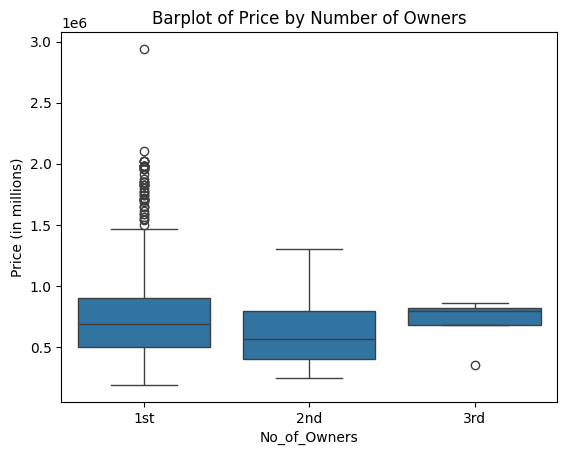

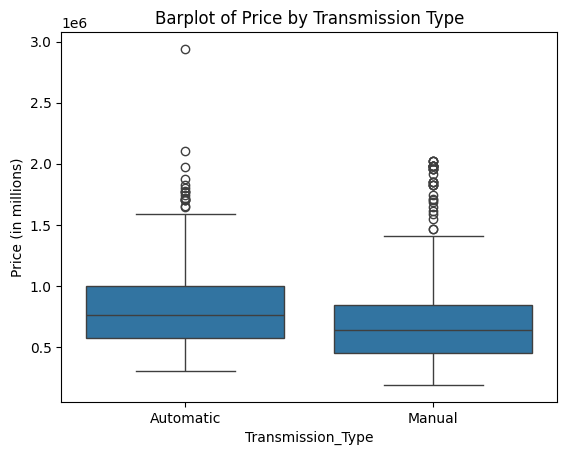

In [ ]:
sns.kdeplot(x=cars['Price'])
plt.title('Density Plot of Price')
plt.xlabel('Price (in millions)')
plt.show()

sns.barplot(x=cars['Make'], y=cars['Price'])
plt.title('Barplot of Price by Make')
plt.ylabel('Price (in millions)')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x=cars['Mileage_Run'], y=cars['Price'])
plt.title('Scatterplot of Mileage vs Price')
plt.ylabel('Price (in millions)')
plt.show()

sns.boxplot(x=cars['No_of_Owners'], y=cars['Price'])
plt.title('Barplot of Price by Number of Owners')
plt.ylabel('Price (in millions)')
plt.show()

sns.boxplot(x=cars['Transmission_Type'], y=cars['Price'])
plt.title('Barplot of Price by Transmission Type')
plt.ylabel('Price (in millions)')
plt.show()

In [ ]:
#2
make_dummy = pd.get_dummies(cars['Make'], dtype='int', drop_first=True)
color_dummy = pd.get_dummies(cars['Color'], dtype='int', drop_first=True)
body_dummy = pd.get_dummies(cars['Body_Type'], dtype='int', drop_first=True)
owners_dummy = pd.get_dummies(cars['No_of_Owners'], dtype='int', drop_first=True)
fuel_dummy = pd.get_dummies(cars['Fuel_Type'], dtype='int', drop_first=True)
tran_dummy = pd.get_dummies(cars['Transmission'], dtype='int', drop_first=True)
TT_dummy = pd.get_dummies(cars['Transmission_Type'], dtype='int', drop_first=True)

In [ ]:
#3
y = cars['Price']
x = pd.concat([make_dummy, color_dummy, body_dummy, owners_dummy, fuel_dummy, tran_dummy, TT_dummy,
               cars['Make_Year'], cars['Seating_Capacity'], cars['Mileage_Run']], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.2,
                                                    random_state=100)

In [ ]:
#4: Mileage Run
y = y_train
x = pd.DataFrame(x_train['Mileage_Run'])
x_t = pd.DataFrame(x_test['Mileage_Run'])
y_t = y_test
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
y_hat = lm.predict(x_t)
print('R^2: ', lm.score(x_t,y_t))
print('R^2 train: ', lm.score(x,y))
rmse = np.sqrt(np.mean((y_t - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Variable': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.016246470464106877
R^2 train:  0.03172333587293674
RMSE:  367530.1613194705


,Variable,Coefficient
0,Mileage_Run,-2.667905


In [ ]:
#Make year
y = y_train
x = pd.DataFrame(x_train['Make_Year'])
x_t = pd.DataFrame(x_test['Make_Year'])
y_t = y_test
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
y_hat = lm.predict(x_t)
print('R^2: ', lm.score(x_t,y_t))
print('R^2 train: ', lm.score(x,y))
rmse = np.sqrt(np.mean((y_t - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Variable': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.2895323027101395
R^2 train:  0.2758761342527142
RMSE:  312335.96957018087


,Variable,Coefficient
0,Make_Year,67298.144305


In [ ]:
#Seating capacity
y = y_train
x = pd.DataFrame(x_train['Seating_Capacity'])
x_t = pd.DataFrame(x_test['Seating_Capacity'])
y_t = y_test
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
y_hat = lm.predict(x_t)
print('R^2: ', lm.score(x_t,y_t))
print('R^2 train: ', lm.score(x,y))
rmse = np.sqrt(np.mean((y_t - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Variable': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.0011115897738707137
R^2 train:  0.006008919894476716
RMSE:  370346.5646970541


,Variable,Coefficient
0,Seating_Capacity,62960.84201


In [ ]:
#All prices
cars['BodyXColor'] = cars['Body_Type']+'X'+cars['Color']
BxC_dummy = pd.get_dummies(cars['BodyXColor'], dtype='int', drop_first=True)
cars['TranXType'] = cars['Transmission']+'X'+cars['Transmission_Type']
TxTT_dummy = pd.get_dummies(cars['TranXType'], dtype='int', drop_first=True)

y = cars['Price']
x = pd.concat([make_dummy, owners_dummy, fuel_dummy,
               cars['Make_Year'], cars['Seating_Capacity'], cars['Mileage_Run'],
               BxC_dummy, TxTT_dummy], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.2,
                                                    random_state=100)

lm = linear_model.LinearRegression(fit_intercept=True).fit(x_train,y_train)
y_hat = lm.predict(x_test)
print('R^2: ', lm.score(x_test,y_test))
print('R^2 train: ', lm.score(x_train,y_train))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Variable': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.8603644740940777
R^2 train:  0.8553586328865831
RMSE:  138467.4823910165


,Variable,Coefficient
0,Datsun,-24598.909278
1,Ford,36289.461731
2,Honda,161273.221647
3,Hyundai,160241.657996
4,Jeep,357023.291380
...,...,...
76,6-SpeedXAutomatic,65225.129186
77,6-SpeedXManual,119327.692086
78,7-SpeedXAutomatic,382317.398163
79,7-SpeedXManual,221134.741386


This model has a higher R^2 calue and lower RMSE value so this model is a better fit for prediction. There are 81 predictors and many dummy variables which is okay for this prediction but the model cannot really be used for interpretation since you can't really analyze the coefficients. It will be better to eliminate most predictors and only use the most influential ones.


Part 6:
Part 5 might not be due to overfitting since R^2 is pretty high on the training and test set and equal between both. It is difficult to interpret but part 4 shows examples of underfitting in the mileage run and seating capacity models. These models have R^2 values for the training sets that are higher than those for the test sets so the model isn't that useful for prediction. It shows underfitting and needs more predictors, but it is important to test out many different models to determine which one is the best and most accurate.